In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define parameters
L = 50  # Lattice size
Q = 6   # Number of grain orientations
T = 0.05  # Temperature
num_iterations = 2000  # Number of Monte Carlo steps

# Initialize lattice with random grain orientations
lattice = np.random.randint(0, Q, (L, L))

# Define the energy function
def calculate_energy(lattice, x, y):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    energy = 0
    for dx, dy in neighbors:
        nx, ny = (x + dx) % L, (y + dy) % L
        if lattice[x, y] != lattice[nx, ny]:
            energy += 1
    return energy

# Monte Carlo step
def monte_carlo_step(lattice, T):
    for _ in range(L**2):
        x, y = np.random.randint(0, L, size=2)
        current_energy = calculate_energy(lattice, x, y)
        
        new_orientation = np.random.randint(0, Q)
        old_orientation = lattice[x, y]
        lattice[x, y] = new_orientation
        new_energy = calculate_energy(lattice, x, y)
        
        delta_energy = new_energy - current_energy
        
        if delta_energy > 0 and np.random.rand() >= np.exp(-delta_energy / T):
            lattice[x, y] = old_orientation  # Reject change
            
# Simulation
for i in range(num_iterations):
    monte_carlo_step(lattice, T)
    if i % 100 == 0:  # Plot every 100 iterations
        plt.imshow(lattice, cmap='tab10')
        plt.title(f"Iteration {i}")
        plt.show()

# Final plot
plt.imshow(lattice, cmap='tab10')
plt.title("Final Grain Structure")
plt.show()


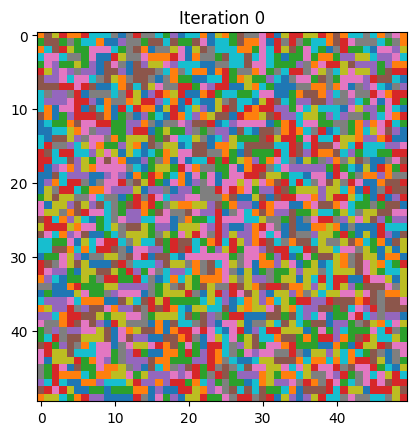

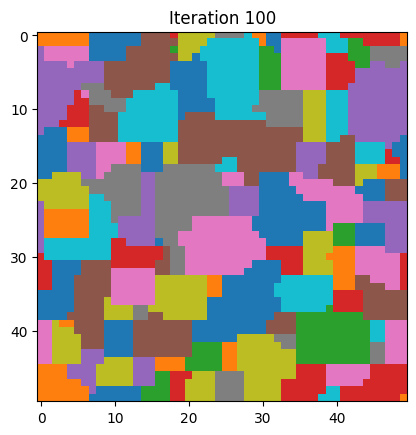

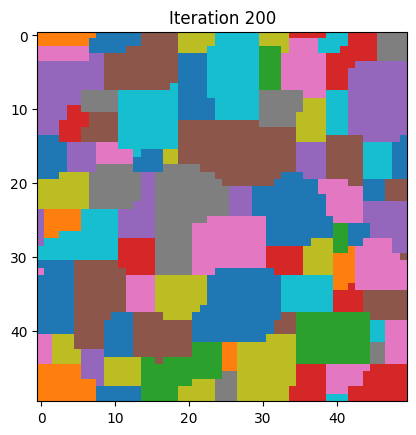

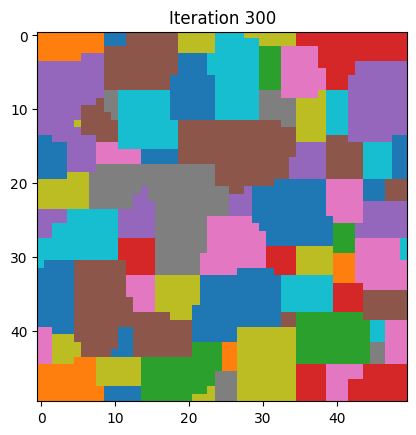

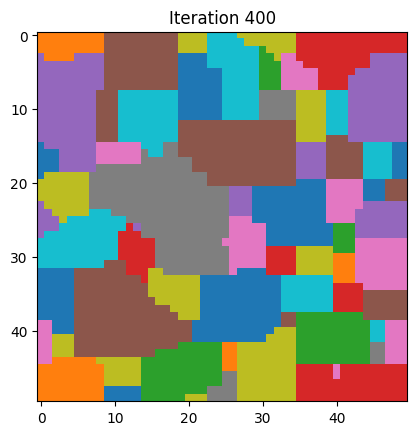

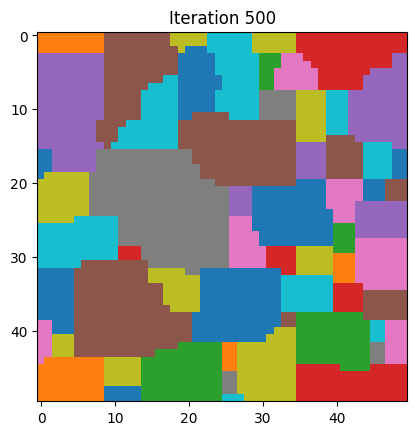

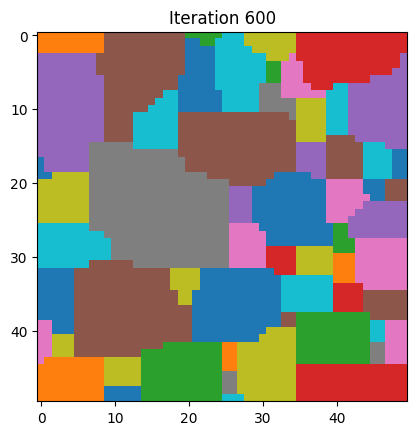

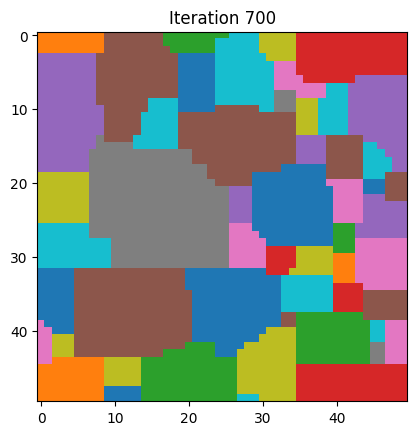

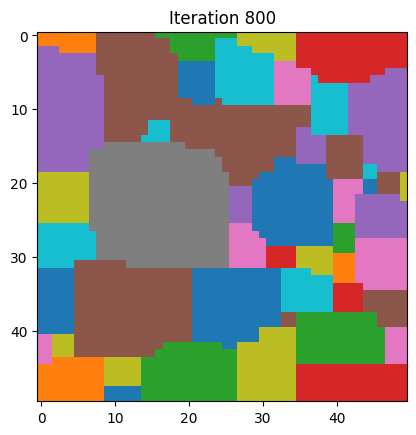

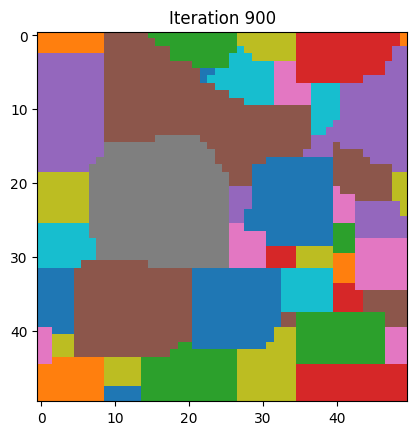

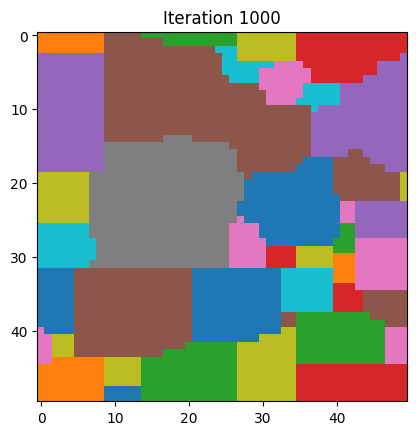

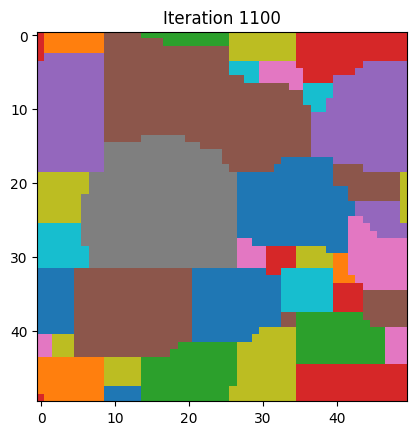

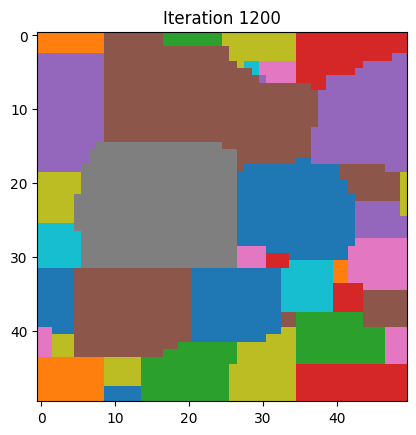

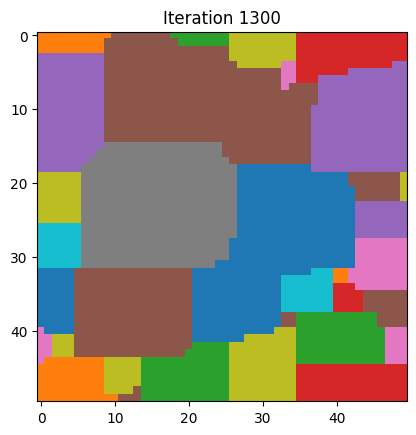

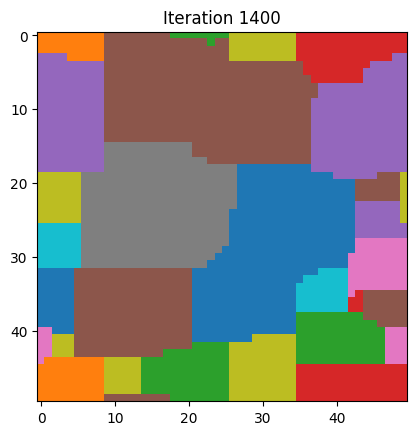

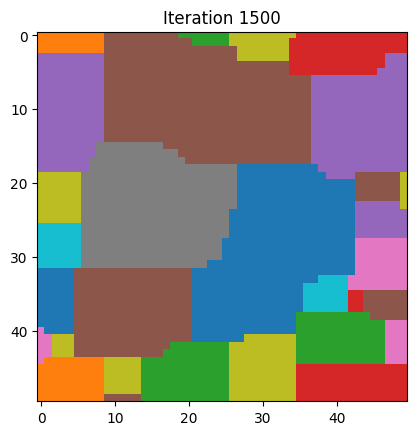

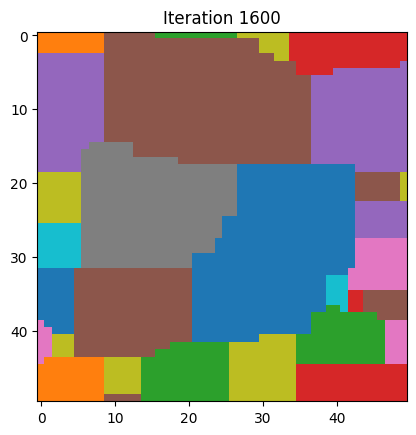

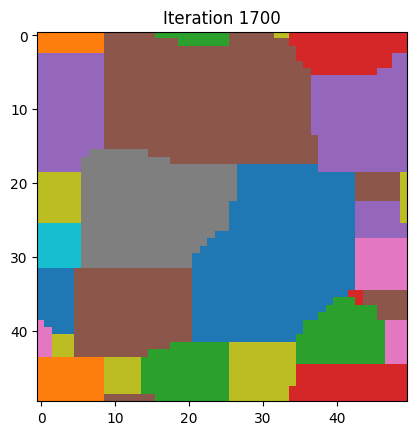

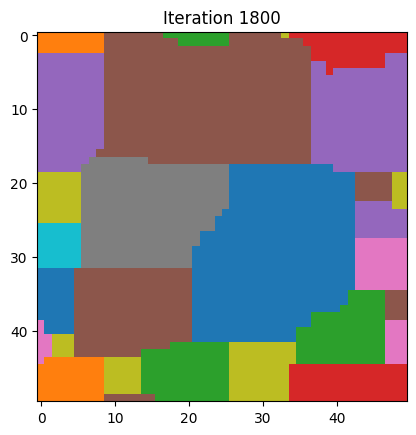

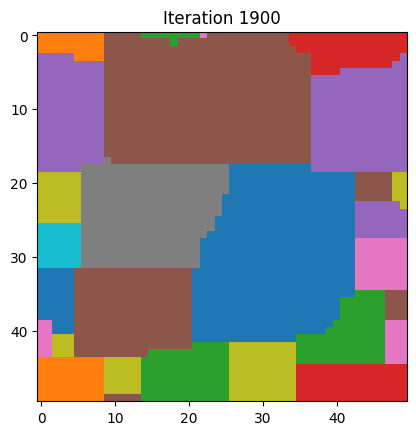

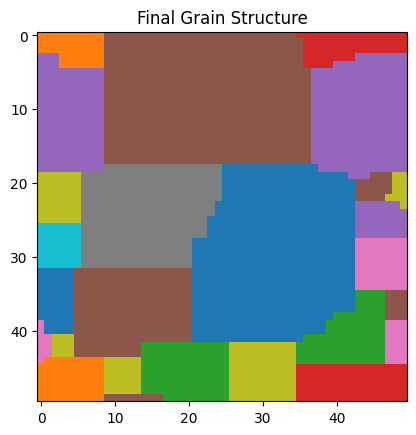

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 50  # Lattice size
Q = 10  # Number of grain orientations
num_iterations = 2000  # Number of Monte Carlo steps

# Initialize lattice with random grain orientations
lattice = np.random.randint(0, Q, (L, L))

# Define the crater temperature gradient
T_min, T_max = 0.1, 0.3
center_x, center_y = 0, L // 2


def crater_temperature(x, y, center_x, center_y, T_min, T_max, L):
    distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    max_distance = L #np.sqrt((center_x) ** 2 + (center_y) ** 2)
    return T_max - (T_max - T_min) * (distance / max_distance)


temperature = np.zeros((L, L))
for x in range(L):
    for y in range(L):
        temperature[x, y] = crater_temperature(
            x, y, center_x, center_y, T_min, T_max, L
        )


# Define the energy function
def calculate_energy(lattice, x, y):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    energy = 0
    for dx, dy in neighbors:
        nx, ny = (x + dx) % L, (y + dy) % L
        if lattice[x, y] != lattice[nx, ny]:
            energy += 1
    return energy


# Monte Carlo step with crater temperature gradient
def monte_carlo_step(lattice, temperature):
    for _ in range(L**2):
        x, y = np.random.randint(0, L, size=2)
        current_energy = calculate_energy(lattice, x, y)

        new_orientation = np.random.randint(0, Q)
        old_orientation = lattice[x, y]
        lattice[x, y] = new_orientation
        new_energy = calculate_energy(lattice, x, y)

        delta_energy = new_energy - current_energy

        T = temperature[x, y]  # Local temperature from the gradient
        if delta_energy > 0 and np.random.rand() >= np.exp(-delta_energy / T):
            lattice[x, y] = old_orientation  # Reject change


# Simulation
for i in range(num_iterations):
    monte_carlo_step(lattice, temperature)
    if i % 100 == 0:  # Plot every 100 iterations
        plt.imshow(lattice, cmap="tab10")
        plt.title(f"Iteration {i}")
        plt.show()

# Final plot
plt.imshow(lattice, cmap="tab10")
plt.title("Final Grain Structure")
plt.show()
